In [208]:
# standard libraries
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal, norm
from scipy import linalg, stats
import time
import importlib
import sys
sys.path.append('..')

import GaussianODEs as ode
import GaussianAlgorithms as algo
importlib.reload(ode)
importlib.reload(algo)

<module 'GaussianAlgorithms' from '/Users/francescacrucinio/Documents/PAPERS/SUBMITTED/SMC-WFR/GaussianAlgorithms.py'>

In [209]:
mu = 1
sigma = 5
mu0 = 0
sigma0 = 1

## WFR

In [210]:
Niter = 400
gamma = 0.01
mean_eq_wfr, var_eq_wfr, kl_wfrinf = ode.wfr_infinite_time(mu0, mu, sigma0, sigma, Niter, gamma)

In [211]:
N = 1000
X0 = np.random.normal(size = N)

In [212]:
x, W = algo.SMC_WFR(gamma, Niter, mu, sigma, mu0, sigma0, X0)

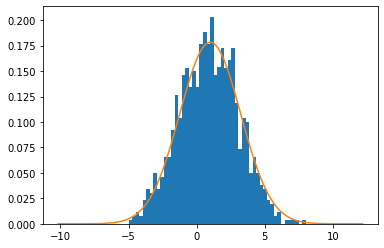

In [213]:
plt.hist(x[-1, :], density = True, weights = W[-1, :], bins = 50)
plt.plot(np.linspace(mu-5*np.sqrt(sigma), mu+5*np.sqrt(sigma), 100), norm.pdf(np.linspace(mu-5*np.sqrt(sigma), mu+5*np.sqrt(sigma), 100), scale = np.sqrt(sigma), loc = mu))

In [214]:
mean_smc = np.zeros(Niter+1)
var_smc = np.zeros(Niter+1)
kl_smc = np.zeros(Niter+1)
for i in range(Niter+1):
    mean_smc[i] = np.sum(x[i, :]*W[i, :])
    var_smc[i] = np.sum(x[i, :]**2*W[i, :]) - mean_smc[i]**2
    kl_smc[i] = ode.KL(mean_smc[i], var_smc[i], mu, sigma)

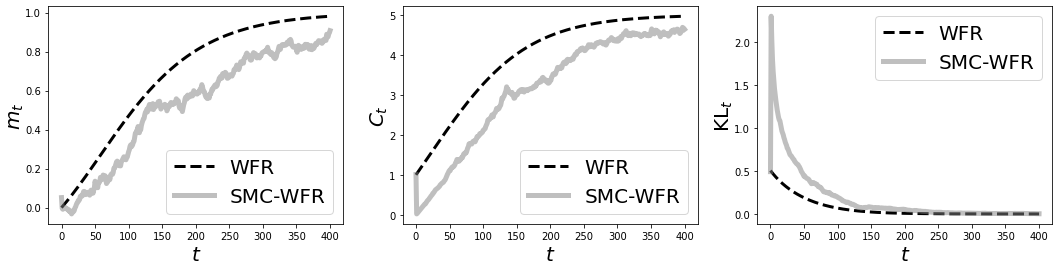

In [215]:
plt.figure(figsize = (18, 4))
plt.subplot(1, 3, 1)
plt.plot(mean_eq_wfr, label = 'WFR', linestyle = 'dashed', lw = 3, color = 'black')
plt.plot(mean_smc, label = 'SMC-WFR', color = 'gray', alpha = 0.5, lw = 5)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$m_t$', fontsize = 20, labelpad=-1)
plt.legend(fontsize = 20)
plt.subplot(1, 3, 2)
plt.plot(var_eq_wfr, label = 'WFR', linestyle = 'dashed', lw = 3, color = 'black')
plt.plot(var_smc, label = 'SMC-WFR', color = 'gray', alpha = 0.5, lw = 5)
plt.legend(fontsize = 20)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$C_t$', fontsize = 20, labelpad=-1)
plt.subplot(1, 3, 3)
plt.plot(kl_wfrinf, label = 'WFR', linestyle = 'dashed', lw = 3, color = 'black')
plt.plot(kl_smc, label = 'SMC-WFR', color = 'gray', alpha = 0.5, lw = 5)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('KL$_t$', fontsize = 20, labelpad=-1)
plt.legend(fontsize = 20)
# plt.savefig('SMC_WFR_gaussian.pdf', bbox_inches="tight")

## SMC-ULA

In [187]:
gamma = 0.01
Niter = 400
x, W = algo.SMC_ULA(gamma, Niter, mu, sigma, mu0, sigma0, X0)

[4.25698094e-28 1.61760898e-32 1.38588114e-34 1.01202432e-21
 6.38120616e-26 1.39115471e-35 1.60834865e-36 2.35869820e-30
 3.10932787e-44 2.30822102e-38 7.05439866e-29 1.76613745e-29
 6.46562097e-28 1.76601409e-34 2.63082579e-52 1.92908772e-41
 6.68873240e-20 1.15470497e-32 5.59689564e-33 2.28000706e-19
 3.25709491e-36 1.18397608e-35 2.51735133e-30 2.29489797e-39
 3.36543318e-25 1.74729669e-38 1.26325710e-43 7.27965599e-36
 2.65812584e-48 1.43546351e-26 1.68940718e-32 2.11010687e-31
 3.64197472e-30 6.29914553e-27 3.97946407e-44 1.04624450e-27
 4.19273762e-32 2.15286834e-26 3.65086818e-28 2.23374727e-40
 9.54173048e-48 2.99736156e-36 1.57460185e-26 5.34820832e-35
 3.40421116e-42 3.66805039e-37 9.30539651e-33 6.63509611e-33
 1.23678962e-53 1.96339134e-29 5.32000901e-31 1.57135020e-31
 2.89168950e-46 1.06712715e-34 1.04227012e-32 7.71792203e-27
 1.80498189e-52 1.80774581e-38 1.55980865e-32 3.37539798e-35
 6.09788905e-42 2.56184596e-38 1.06308226e-47 5.88176540e-26
 2.79568123e-32 4.528547

[1.72433943e-14 8.09486792e-16 2.73783714e-09 2.31284246e-21
 5.60034637e-14 2.81435180e-15 4.21966551e-05 3.79963128e-16
 8.42806791e-16 4.93246171e-12 4.14782143e-18 7.46258156e-19
 1.32747132e-18 1.19294902e-11 1.01649402e-23 2.81682782e-20
 1.08801407e-22 1.60810491e-19 3.80816689e-15 2.03673169e-15
 1.58048256e-14 3.39511126e-10 7.14401276e-08 1.31906398e-17
 7.76245894e-18 2.72500906e-13 6.70722331e-16 1.36228397e-15
 2.35859208e-13 7.43314806e-23 2.89060871e-17 2.55738777e-16
 9.07245916e-14 1.93263190e-15 3.14912608e-10 2.45732475e-17
 1.40737250e-16 3.25590704e-10 1.10720459e-12 1.03611465e-12
 6.04343210e-15 6.17996722e-25 2.52023238e-17 1.09179325e-21
 4.52201531e-09 1.40952881e-11 1.21197653e-20 5.42019086e-13
 1.10562152e-24 1.77274531e-15 4.33563478e-14 6.28863507e-15
 4.08827764e-08 3.46774992e-09 1.29695515e-08 5.41675184e-17
 1.49914238e-11 1.86701168e-11 1.17309149e-16 2.34810734e-16
 2.27193931e-07 3.53677253e-19 4.94226967e-17 2.15030962e-21
 1.49163511e-11 1.437490

[1.42845108e-07 4.05897242e-13 1.19585632e-11 6.52273790e-04
 2.04341288e-03 4.05897175e-04 7.09127989e-07 2.37311454e-06
 2.34578613e-06 6.62997046e-01 1.24763024e-02 2.94020014e-07
 7.72319886e-10 1.13921572e-07 7.68703607e-12 6.83073340e-14
 7.12893620e-14 1.52815905e-07 2.38187972e-08 1.12021098e-05
 2.78424645e-09 4.78452396e-09 5.26531951e-06 1.21159738e-02
 4.51688663e-01 3.23065801e-13 7.09222121e-11 2.83385885e-09
 1.80606734e-09 2.09464177e-07 2.99301118e-05 1.20761299e-06
 1.61318214e-06 6.09552423e-04 5.78173375e-11 9.79540396e-07
 2.40310359e-14 2.19271375e-10 6.77659559e-11 1.21693291e-09
 1.16593228e-07 7.88498255e-07 6.34298075e-14 5.20088342e-10
 7.45883795e-09 1.46834114e-14 3.52656184e-04 4.79581094e-10
 9.40472268e-08 1.96985575e-03 8.37386931e-08 2.47221098e-08
 1.30351683e-07 1.78449266e-03 4.18944790e-06 6.19874449e-06
 3.37409275e-05 4.13806810e-06 8.45499504e-12 6.83887256e-10
 1.18534585e-13 7.49323854e-09 3.69559690e-04 1.68597742e-05
 3.60478157e-11 2.739917

[1.17688853e+01 3.92276891e-06 7.85491619e-03 7.44423548e-06
 1.12253191e+00 6.11162701e-01 2.22360175e-05 1.78245780e-05
 2.69665824e-07 2.58492800e+00 2.53811933e-03 9.55905845e+00
 1.08912355e-04 6.34808847e-02 9.68299414e-05 1.90552684e-08
 1.02341220e-03 3.07130082e-09 6.41788236e-07 3.38491625e-04
 9.21378471e+02 7.16807566e-02 2.70621586e-04 1.09392846e-02
 2.38547450e-01 9.06056416e-09 2.09454486e-03 5.08266333e-01
 3.34814919e-03 7.63811954e-05 2.11010074e-06 8.42186647e-01
 8.90559759e-06 3.14510469e-05 1.98476301e-05 5.58695615e-05
 2.97871897e-02 5.35343232e-05 2.74583316e-02 1.26921205e+02
 2.29878589e-04 6.54482535e-02 2.91783237e-02 7.12686330e-03
 5.98026771e-07 4.53062195e-01 8.60997658e-03 3.15939855e-04
 2.25677695e-06 1.49036296e-03 1.67024791e-04 5.03997992e-05
 7.34935967e-03 1.22635194e-03 3.54287033e-02 2.12269618e-07
 4.59921134e-09 2.79254988e-02 4.60725436e-02 4.07021288e-01
 6.00560083e-05 8.38997767e-07 9.97404816e-04 6.59240931e-05
 1.45404635e-04 1.328880

[5.44888621e-01 1.25376965e-05 1.82219496e+00 2.02200301e-01
 1.17456128e-04 5.11927848e-03 3.84334258e-04 1.55641256e+00
 4.56850445e-01 5.50000603e-02 2.69942392e+01 8.03061913e-02
 6.61976683e-04 1.29878979e+00 6.93173950e-03 1.45969056e-01
 6.66999757e-04 7.08180981e-02 4.23281927e-05 1.83446627e-02
 1.45580128e-01 8.03651605e+00 1.07579335e+00 5.41217855e-03
 4.42464182e-03 3.02995824e-01 4.99616495e-05 5.44731485e-04
 2.64470467e-02 4.12488976e-02 1.32817429e-03 1.43209890e-01
 1.27618869e-03 1.28758350e-04 7.03280214e+01 1.64139026e-02
 3.11619685e-05 1.60598048e-01 7.20804850e-03 1.53148747e+04
 6.53213850e-01 2.96648008e-02 5.42087668e+00 2.23147627e-02
 7.14283511e-06 7.76196764e-05 3.53500994e-03 5.90646139e-01
 4.42692623e-04 2.76129043e-02 3.20281627e+00 2.64199225e-02
 8.87282061e-04 3.55651604e-02 1.43138624e-03 6.99793706e-02
 4.04500054e-05 7.44405088e-05 2.29707347e-02 5.96775436e-04
 3.48929687e-02 2.10665505e-02 8.42717572e-03 2.53987828e-01
 1.35975048e-03 2.375458

[3.08570208e+01 1.44478862e-01 4.89795740e-03 1.31688566e-01
 1.18216331e+00 3.90671148e-02 1.98059038e-01 2.94409130e-04
 2.42766757e-02 2.76501942e+00 4.88208606e-02 5.12912504e-02
 1.63884019e+01 2.02765445e-01 2.25678736e-01 6.32524311e-02
 1.76599140e-02 6.33364097e+00 4.94037602e-02 4.89220845e-02
 4.26311645e-03 1.15080020e-02 1.95949529e-01 2.71333815e-01
 1.56468367e-01 5.20180222e-01 3.24507216e+00 5.96496048e-02
 1.27941004e-01 2.22377837e+00 4.11518112e-02 2.35881020e-01
 6.89208340e-01 1.97283382e-03 8.84223999e+00 6.27441633e-01
 7.12713976e-02 5.92247970e-02 1.20262175e-02 3.36699978e+00
 3.44810559e-03 2.17786707e-01 2.63307209e-03 4.60327377e-04
 7.13259563e-03 1.32759164e+01 7.13424209e-01 3.04503628e-01
 2.03628293e-01 4.44259278e-02 2.29385078e+00 4.22447396e-02
 2.35791380e-01 5.16900038e-02 4.72039084e-02 1.91789607e-02
 2.34341035e+01 8.57158149e-01 6.83792650e-02 3.34552663e-01
 6.11007581e+01 2.66774719e-01 1.55280322e-02 3.89056791e+00
 1.72090768e+00 1.180584

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



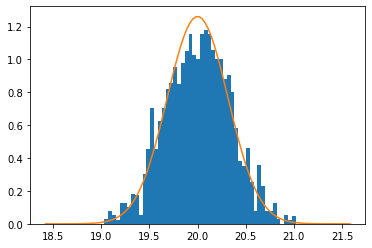

In [178]:
plt.hist(x[-1, :], density = True, weights = W[-1, :], bins = 50)
plt.plot(np.linspace(mu-5*np.sqrt(sigma), mu+5*np.sqrt(sigma), 100), norm.pdf(np.linspace(mu-5*np.sqrt(sigma), mu+5*np.sqrt(sigma), 100), scale = np.sqrt(sigma), loc = mu))

In [179]:
mean_smc = np.zeros(Niter+1)
var_smc = np.zeros(Niter+1)
kl_smc = np.zeros(Niter+1)
for i in range(Niter+1):
    mean_smc[i] = np.sum(x[i, :]*W[i, :])
    var_smc[i] = np.sum(x[i, :]**2*W[i, :]) - mean_smc[i]**2
    kl_smc[i] = ode.KL(mean_smc[i], var_smc[i], mu, sigma)

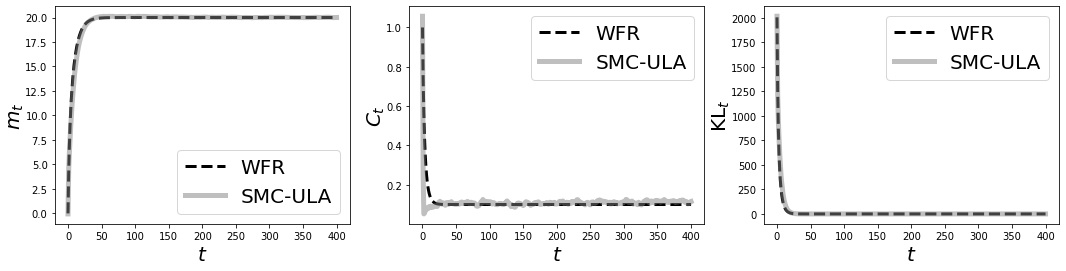

In [180]:
plt.figure(figsize = (18, 4))
plt.subplot(1, 3, 1)
plt.plot(mean_eq_wfr, label = 'WFR', linestyle = 'dashed', lw = 3, color = 'black')
plt.plot(mean_smc, label = 'SMC-ULA', color = 'gray', alpha = 0.5, lw = 5)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$m_t$', fontsize = 20, labelpad=-1)
plt.legend(fontsize = 20)
plt.subplot(1, 3, 2)
plt.plot(var_eq_wfr, label = 'WFR', linestyle = 'dashed', lw = 3, color = 'black')
plt.plot(var_smc, label = 'SMC-ULA', color = 'gray', alpha = 0.5, lw = 5)
plt.legend(fontsize = 20)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$C_t$', fontsize = 20, labelpad=-1)
plt.subplot(1, 3, 3)
plt.plot(kl_wfrinf, label = 'WFR', linestyle = 'dashed', lw = 3, color = 'black')
plt.plot(kl_smc, label = 'SMC-ULA', color = 'gray', alpha = 0.5, lw = 5)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('KL$_t$', fontsize = 20, labelpad=-1)
plt.legend(fontsize = 20)
# plt.savefig('SMC_ULA_gaussian.pdf', bbox_inches="tight")

## Unit time FR

In [9]:
mean_eq_fr, var_eq_fr, kl_fr = ode.fisherrao_unit_time(mu0, mu, sigma0, sigma, Niter)

In [10]:
xSMC, WSMC = algo.SMC_UnitFR(Niter, mu, sigma, mu0, sigma0, X0)

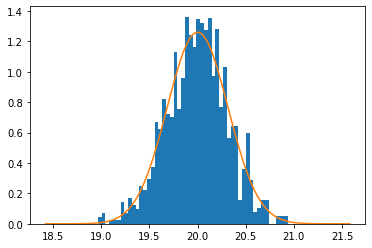

In [11]:
plt.hist(xSMC[-1, :], density = True, weights = WSMC[-1, :], bins = 50)
plt.plot(np.linspace(mu-5*np.sqrt(sigma), mu+5*np.sqrt(sigma), 100), norm.pdf(np.linspace(mu-5*np.sqrt(sigma), mu+5*np.sqrt(sigma), 100), scale = np.sqrt(sigma), loc = mu))

In [12]:
mean_smc = np.zeros(Niter+1)
var_smc = np.zeros(Niter+1)
kl_smc = np.zeros(Niter+1)
for i in range(Niter+1):
    mean_smc[i] = np.sum(xSMC[i, :]*WSMC[i, :])
    var_smc[i] = np.sum(xSMC[i, :]**2*WSMC[i, :]) - mean_smc[i]**2
    kl_smc[i] = ode.KL(mean_smc[i], var_smc[i], mu, sigma)

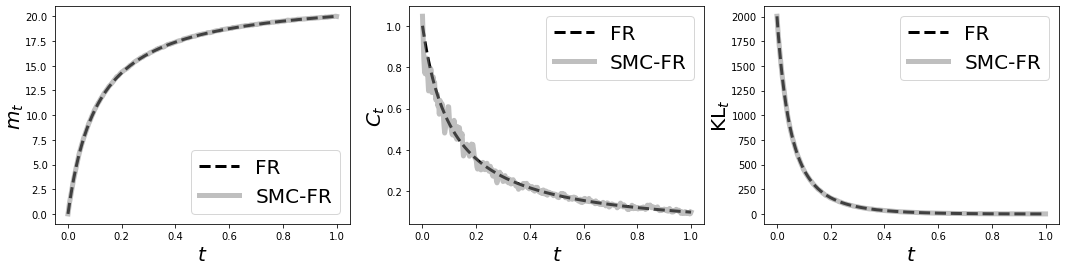

In [13]:
plt.figure(figsize = (18, 4))
plt.subplot(1, 3, 1)
plt.plot(np.arange(Niter+1)/Niter, mean_eq_fr, label = 'FR', linestyle = 'dashed', lw = 3, color = 'black')
plt.plot(np.arange(Niter+1)/Niter, mean_smc, label = 'SMC-FR', color = 'gray', alpha = 0.5, lw = 5)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$m_t$', fontsize = 20, labelpad=-1)
plt.legend(fontsize = 20)
plt.subplot(1, 3, 2)
plt.plot(np.arange(Niter+1)/Niter, var_eq_fr, label = 'FR', linestyle = 'dashed', lw = 3, color = 'black')
plt.plot(np.arange(Niter+1)/Niter, var_smc, label = 'SMC-FR', color = 'gray', alpha = 0.5, lw = 5)
plt.legend(fontsize = 20)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$C_t$', fontsize = 20, labelpad=-1)
plt.subplot(1, 3, 3)
plt.plot(np.arange(Niter+1)/Niter, kl_fr, label = 'FR', linestyle = 'dashed', lw = 3, color = 'black')
plt.plot(np.arange(Niter+1)/Niter, kl_smc, label = 'SMC-FR', color = 'gray', alpha = 0.5, lw = 5)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('KL$_t$', fontsize = 20, labelpad=-1)
plt.legend(fontsize = 20)
# plt.savefig('SMC_FR_gaussian.pdf', bbox_inches="tight")

## Tempered WFR

In [14]:
lseq_linear = np.arange(1, Niter+1)/Niter
mean_eq_twfr, var_eq_twfr, kl_twfr = ode.tempered_wfr_infinite_time(mu0, mu, sigma0, sigma, Niter, gamma, lseq_linear)

In [15]:
delta_linear = (gamma+np.exp(-gamma)-1)/gamma

In [16]:
x, W = algo.SMC_TWFR(gamma, Niter, mu, sigma, mu0, sigma0, X0, lseq_linear, delta_linear)

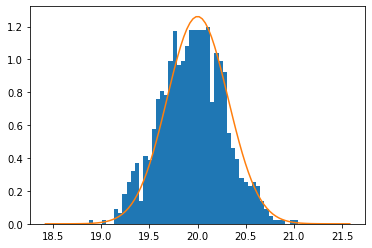

In [17]:
plt.hist(x[-1, :], density = True, weights = W[-1, :], bins = 50)
plt.plot(np.linspace(mu-5*np.sqrt(sigma), mu+5*np.sqrt(sigma), 100), norm.pdf(np.linspace(mu-5*np.sqrt(sigma), mu+5*np.sqrt(sigma), 100), scale = np.sqrt(sigma), loc = mu))

In [18]:
mean_smc = np.zeros(Niter+1)
var_smc = np.zeros(Niter+1)
kl_smc = np.zeros(Niter+1)
for i in range(Niter+1):
    mean_smc[i] = np.sum(xSMC[i, :]*WSMC[i, :])
    var_smc[i] = np.sum(xSMC[i, :]**2*WSMC[i, :]) - mean_smc[i]**2
    kl_smc[i] = ode.KL(mean_smc[i], var_smc[i], mu, sigma)

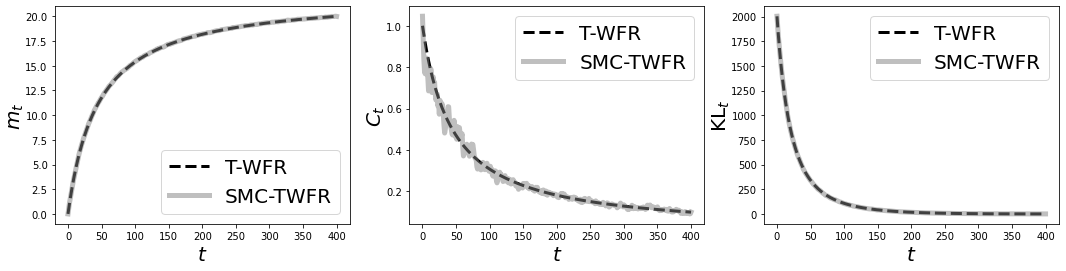

In [19]:
plt.figure(figsize = (18, 4))
plt.subplot(1, 3, 1)
plt.plot(mean_eq_fr, label = 'T-WFR', linestyle = 'dashed', lw = 3, color = 'black')
plt.plot(mean_smc, label = 'SMC-TWFR', color = 'gray', alpha = 0.5, lw = 5)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$m_t$', fontsize = 20, labelpad=-1)
plt.legend(fontsize = 20)
plt.subplot(1, 3, 2)
plt.plot(var_eq_fr, label = 'T-WFR', linestyle = 'dashed', lw = 3, color = 'black')
plt.plot(var_smc, label = 'SMC-TWFR', color = 'gray', alpha = 0.5, lw = 5)
plt.legend(fontsize = 20)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$C_t$', fontsize = 20, labelpad=-1)
plt.subplot(1, 3, 3)
plt.plot(kl_fr, label = 'T-WFR', linestyle = 'dashed', lw = 3, color = 'black')
plt.plot(kl_smc, label = 'SMC-TWFR', color = 'gray', alpha = 0.5, lw = 5)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('KL$_t$', fontsize = 20, labelpad=-1)
plt.legend(fontsize = 20)
plt.savefig('SMC_TWFR_gaussian.pdf', bbox_inches="tight")